# OSMNX Plotting Examples
This notebook contains examples of plotting maps and routes using OSMNX and NetworkX.

In [1]:
import osmnx as ox
import networkx as nx

%matplotlib inline
ox.config(log_file=True, log_console=True, use_cache=True)

#### Example 1: Plotting a small section of roads.

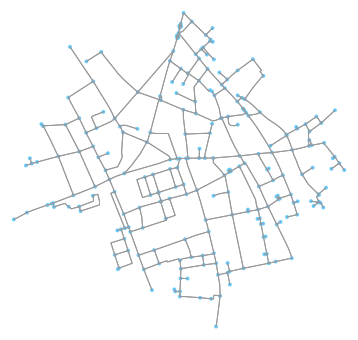

In [3]:
B = ox.graph_from_point((51.5222686,-0.1106871), network_type='walk', 
                        distance=500, distance_type ='network')
fig, ax = ox.plot_graph(B)

#### Example 2: Plotting a route.
Create two routes using nx methods, then plot on top of the road network.

In [15]:
# create route from node ids and visualize
orig_node = 5562142702
dest_node = 107894
mid_node = 1697813677
route = nx.shortest_path(B, orig_node, dest_node, weight='length')
route2 = nx.shortest_path(B, dest_node, mid_node, weight='length')
route3 = nx.shortest_path(B, mid_node, orig_node, weight='length')

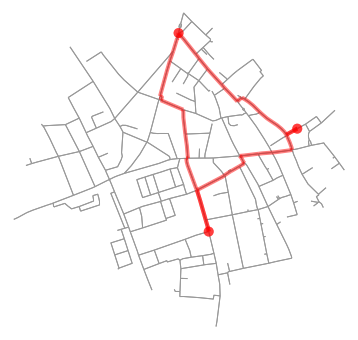

In [16]:
fig, ax = ox.plot_graph_route(B, [route, route2, route3], node_size=0)

In [46]:
# create one big route, plot whole thing
r = route[:-1] + route2[:-1] + route3

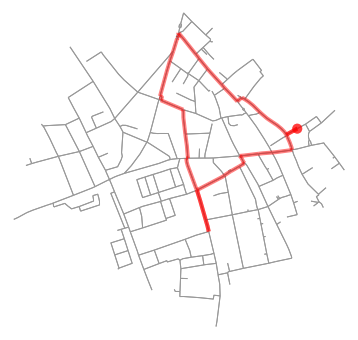

In [47]:
fig, ax = ox.plot_graph_route(B, r, node_size=0)

#### Example 3: Interactive Plotting

In [45]:
r

[5562142702,
 109939,
 419246740,
 18691144,
 1158176377,
 1158176375,
 584412503,
 1677474812,
 107899,
 418036921,
 506861368,
 107894,
 107894,
 5337670062,
 5337670069,
 5337670081,
 11506539,
 25497878,
 25497664,
 18670875,
 109811,
 18670878,
 14804199,
 3210786452,
 1697813698,
 14804196,
 1697813677,
 1697813677,
 14804196,
 1697813698,
 10534456,
 5486316017,
 5486316019,
 25151182,
 25151181,
 18670884,
 5504235168,
 237900,
 13799040,
 33256272,
 109939,
 5562142702]

In [52]:
graph_map = ox.plot_route_folium(B, r, route_opacity=0.3)

In [53]:
# save as html file then display map as an iframe
from IPython.display import IFrame
filepath = 'data/route.html'
graph_map.save(filepath)
IFrame(filepath, width=600, height=500)